In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import random
import torch
import torch.nn.functional as F
from torch.autograd import Variable

from utils import pickle_load
import torchvision.datasets as dset
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms

from utils import plot_omniglot_pairs
from data_loader import get_train_valid_loader, get_test_loader

%load_ext autoreload
%autoreload 2

In [2]:
data_dir = './data/changed/'
batch_size = 32
num_train = int(60e3)
augment = True
valid_trials = 320
test_trials = 400
way = 20

In [3]:
train_loader, valid_loader = get_train_valid_loader(
        data_dir, batch_size, num_train, augment, way=way, trials=valid_trials,
        shuffle=False, seed=0,
)

test_loader = get_test_loader(
    data_dir, way=way, trials=test_trials, seed=0
)

In [4]:
print("Train Pairs: {:,}".format(len(train_loader.dataset)))
print("Valid Trials: {:,}".format(valid_loader.dataset.trials))
print("Test Trials: {:,}".format(test_loader.dataset.trials))

Train Pairs: 60,000
Valid Trials: 320
Test Trials: 400


## Train

/home/shashankv/anaconda3/envs/ml/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


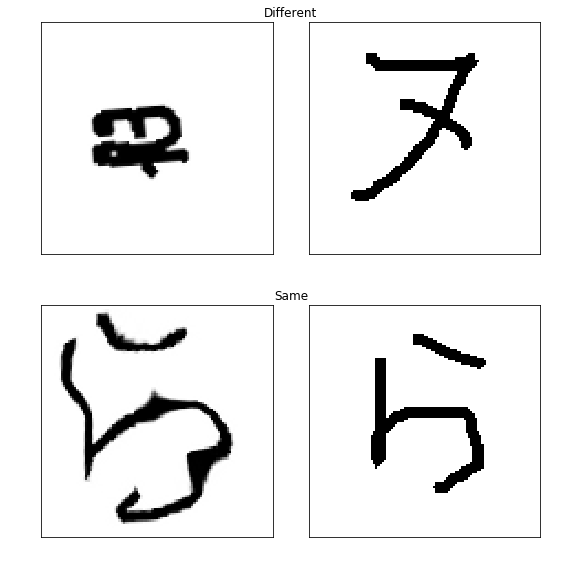

In [5]:
x1, x2, y = next(iter(train_loader))

# grab 2 pairs
x1 = x1[0:2].numpy().squeeze()
x2 = x2[0:2].numpy().squeeze()
y = y[0:2].numpy().squeeze()

plot_omniglot_pairs(x1, x2, y, save=True, name='augmented.png')

## Valid

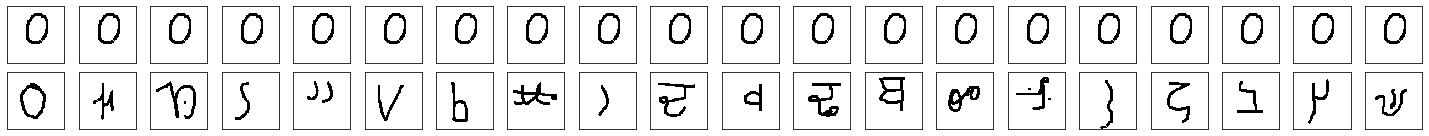

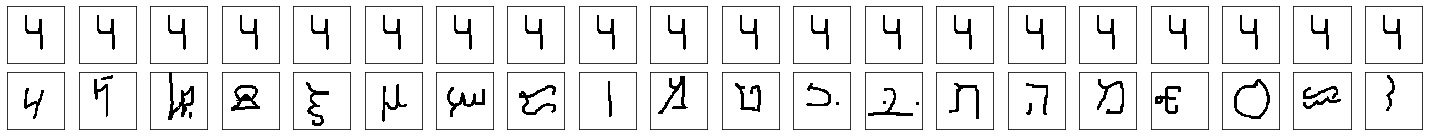

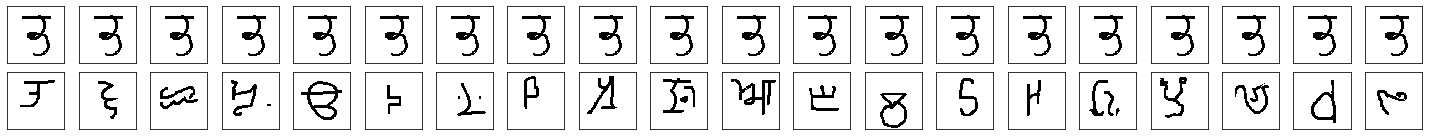

In [6]:
for i, (x1, x2) in enumerate(valid_loader):
    if i >= 3:
        break

    plt.figure(figsize=(20, 2))

    n = len(x1)

    for i in range(n):
        x1_ = x1[i]
        x2_ = x2[i]

        # display top
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x1_.squeeze())
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display bottom
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(x2_.squeeze())
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.tight_layout()
    plt.show()

## Test

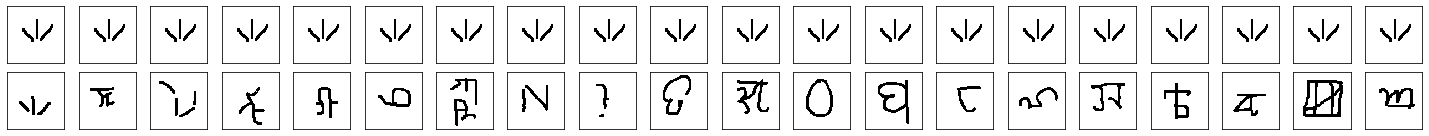

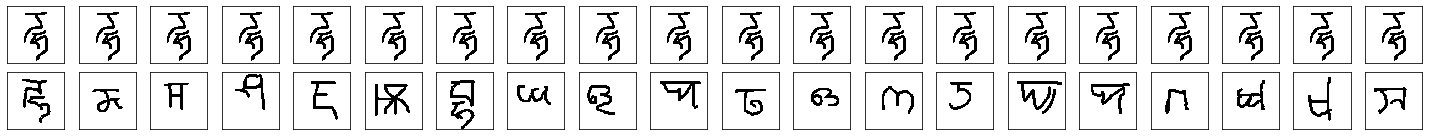

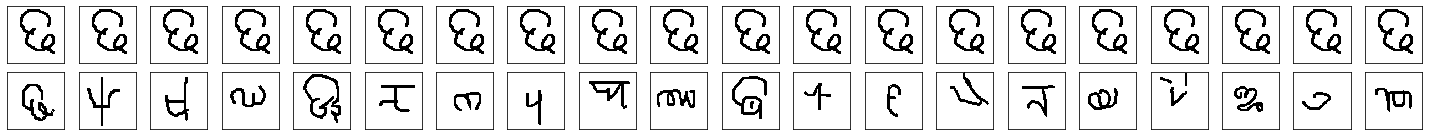

In [7]:
for i, (x1, x2) in enumerate(test_loader):
    if i >= 3:
        break

    plt.figure(figsize=(20, 2))

    n = len(x1)

    for i in range(n):
        x1_ = x1[i]
        x2_ = x2[i]

        # display top
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x1_.squeeze())
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display bottom
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(x2_.squeeze())
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.tight_layout()
    plt.show()